# Analytic Vidya - Black Friday 

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data

| Variable                   | Definition                                          |
|----------------------------|-----------------------------------------------------|
| User_ID                    | User ID                                             |
| Product_ID                 | Product ID                                          |
| Gender                     | Sex of User                                         |
| Age                        | Age in bins                                         |
| Occupation                 | Occupation (Masked)                                 |
| City_Category              | Category of the City (A,B,C)                        |
| Stay_In_Current_City_Years | Number of years stay in current city                |
| Marital_Status             | Marital Status                                      |
| Product_Category_1         | Product Category (Masked)                           |
| Product_Category_2         | Product may belongs to other category also (Masked) |
| Product_Category_3         | Product may belongs to other category also (Masked) |
| Purchase                   | Purchase Amount (Target Variable)                   |

## Exploration

In [1]:
import pandas as pd

In [2]:
filename = './train_oSwQCTC/train.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# missing data in Product_Category_2 and Product_Category_3
df.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

In [5]:
# there are mutiple purchase per user in this dataset
df.User_ID.duplicated().any()

True

In [6]:
# How many users?
df.User_ID.value_counts().count()

5891

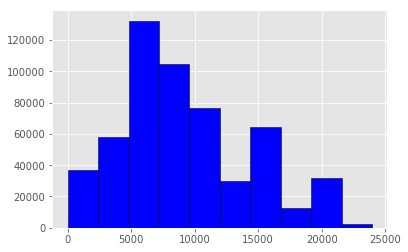

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# What is the distribution of purchases price?
df.Purchase.hist(color='b', edgecolor ='k')

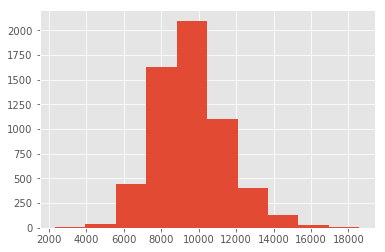

In [8]:
# What is the average purchase amount per user?
df.groupby(['User_ID']).Purchase.mean().hist()

(0, 100)

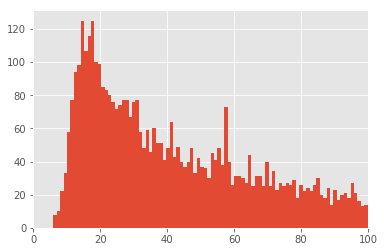

In [9]:
# how many purchase per user ?
df.groupby(['User_ID']).User_ID.count().hist(bins=1000)
import matplotlib.pyplot as plt
plt.gca().set_xlim(0,100)

## Gender

There are only Male or Female in this dataset, encode with arbitrary labeler (i.e. 0 and 1)

In [10]:
# how many different gender types?
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [11]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
Gender_encoder = LabelEncoder()
Gender_coded = Gender_encoder.fit_transform(df.Gender.values)
Gender_encoder.classes_
# sparse matrix conversion
Gender_coded = csr_matrix(Gender_coded.reshape(-1,1))

In [50]:
# could have done it with pandas, gives indexing warning
df.Gender[df.Gender == 'M'] = 0
df.Gender[df.Gender == 'F'] = 1
# # equivalent, gives indexing warning
# df.loc[:,'Gender'][df.Gender == 'M'] = 0
# df.loc[:,'Gender'][df.Gender == 'F'] = 1

# # equivalent but does not give indexing warning
# df.loc[:,'Gender'] = df.loc[:,'Gender'].apply(lambda x: 0 if x == 'M' else 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Age
There are age categories, encode them via one-hot encoding scheme

In [13]:
# how many different age categories?
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelBinarizer
Age_encoder = LabelBinarizer( sparse_output=True )
Age_coded = Age_encoder.fit_transform(df.Age.values)

# print all age categories
print(Age_encoder.classes_)
# print associated encoded values
print(Age_encoder.fit_transform(Age_encoder.classes_))
# resulting feature array should have as many columns as age categories
print(Age_coded.shape)

['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1
  (4, 4)	1
  (5, 5)	1
  (6, 6)	1
(550068, 7)


## Occupation
Occupation are masked. In other words they are already encoded.<br>
Occupation are categorical so we need to use one-hot encoding.

In [15]:
# what are the different occupation ?
df.Occupation.value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [16]:
from sklearn.preprocessing import OneHotEncoder
# outputs sparse matrix by default
Occ_encoder = OneHotEncoder()
Occ_coded = Occ_encoder.fit_transform(df.Occupation.values.reshape(-1,1))

#  number of different values per feature (i.e. per column) encoder found 
print(Occ_encoder.n_values_ )
# resulting feature array should have as many columns as categories
print(Occ_coded.shape)

[21]
(550068, 21)


## City categories
There are 3 city categories: A, B and C.<br>
Encoded them via labelbinarizer

In [17]:
# what are the different city categories?
df.City_Category.value_counts().sort_index()

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [18]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelBinarizer
City_encoder = LabelBinarizer(sparse_output=True)
City_coded = City_encoder.fit_transform(df.City_Category.values)

# print all categories
print(City_encoder.classes_)
# print associated encoded values
print(City_encoder.fit_transform(City_encoder.classes_))
# resulting feature array should have as many columns as categories
print(City_coded.shape)

['A' 'B' 'C']
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
(550068, 3)


## Number of year in current city
You can select 0 to 3 years then it is 4+ years.<br>
Replace 4+ with 4 years to keep only numeric values. All we know is it has been at least 4 years.


In [19]:
# years in current city
df.Stay_In_Current_City_Years.value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
from scipy.sparse import csr_matrix
Years_Current_City = df.loc[:,'Stay_In_Current_City_Years'].apply(lambda x: 4 if x == '4+' else int(x)).values
Years_Current_City_csr = csr_matrix(Years_Current_City.reshape(-1,1))
type(Years_Current_City)

numpy.ndarray

In [21]:
# try polynomes on years in current city
from sklearn.preprocessing import PolynomialFeatures
from scipy.sparse import csr_matrix
# object to compute
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
# compute polynomial features
Years_Current_City_poly = poly.fit_transform(Years_Current_City.reshape(-1,1))
# convert to sparse matrix
Years_Current_City_polycsr = csr_matrix(Years_Current_City_poly)
Years_Current_City_polycsr.shape

(550068, 3)

## Marital status
Marital status is 0 or 1. I'm guessing it means you're married if 1 otherwise you're not with 0.<br>
Can be used as given (i.e. without modifications/encoding).

In [22]:
# categories of marital status
df.Marital_Status.value_counts().sort_index()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [23]:
from scipy.sparse import csr_matrix
Mar_status = df.Marital_Status.values
Mar_status = csr_matrix(Mar_status.reshape(-1,1))
Mar_status.shape

(550068, 1)

## Product Categories
Category 1 has 20 products categories (1 to 20). <br>
Category 2 has 17 products categories (2.0 to 18.0). <br>
Category 3 has 15 products categories (3.0 to 18.0, missing 7.0).

In [24]:
# categories of marital status
df.Product_Category_1.value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder
Prod1_encoder = OneHotEncoder()
Prod1_coded = Prod1_encoder.fit_transform(df.Product_Category_1.values.reshape(-1,1))

#  number of different values per feature (i.e. per column) encoder found 
print(Prod1_encoder.n_values_ )
# resulting feature array should have as many columns as categories
print(Prod1_coded.shape)

[21]
(550068, 20)


Product Category 1 is good to go. Let's see if we can combine all product categories

Product_Category_1
1     [[Axes(0.125,0.125;0.775x0.755)]]
2     [[Axes(0.125,0.125;0.775x0.755)]]
3     [[Axes(0.125,0.125;0.775x0.755)]]
4     [[Axes(0.125,0.125;0.775x0.755)]]
5     [[Axes(0.125,0.125;0.775x0.755)]]
6     [[Axes(0.125,0.125;0.775x0.755)]]
7     [[Axes(0.125,0.125;0.775x0.755)]]
8     [[Axes(0.125,0.125;0.775x0.755)]]
9     [[Axes(0.125,0.125;0.775x0.755)]]
10    [[Axes(0.125,0.125;0.775x0.755)]]
11    [[Axes(0.125,0.125;0.775x0.755)]]
12    [[Axes(0.125,0.125;0.775x0.755)]]
13    [[Axes(0.125,0.125;0.775x0.755)]]
14    [[Axes(0.125,0.125;0.775x0.755)]]
15    [[Axes(0.125,0.125;0.775x0.755)]]
16    [[Axes(0.125,0.125;0.775x0.755)]]
17    [[Axes(0.125,0.125;0.775x0.755)]]
18    [[Axes(0.125,0.125;0.775x0.755)]]
19    [[Axes(0.125,0.125;0.775x0.755)]]
20    [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

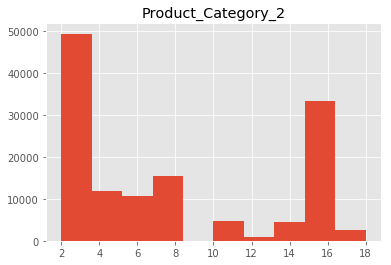

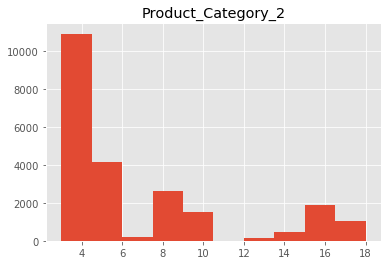

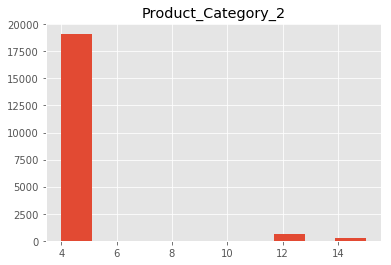

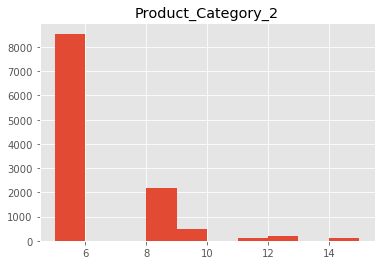

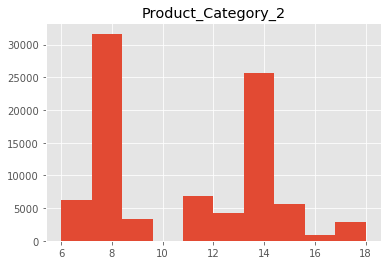

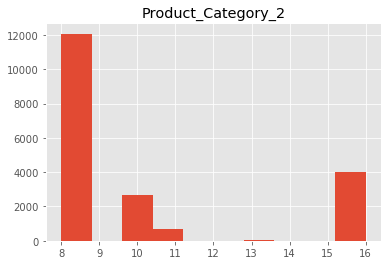

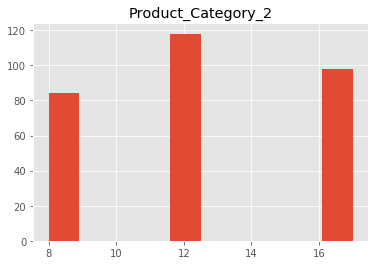

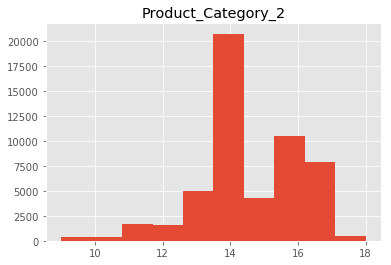

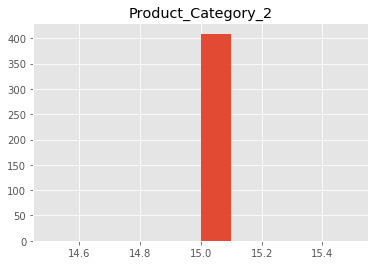

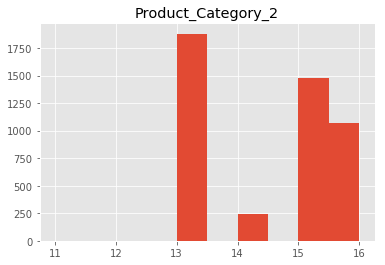

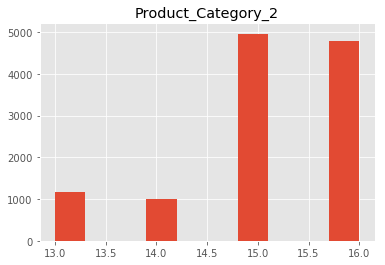

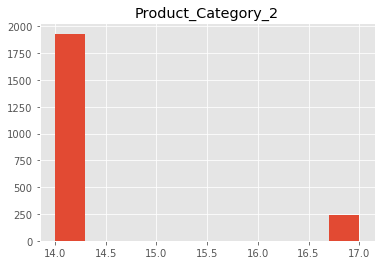

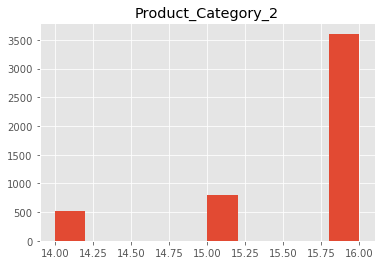

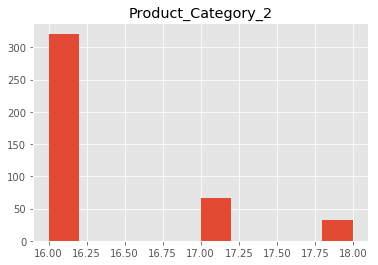

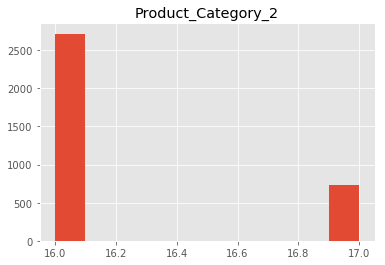

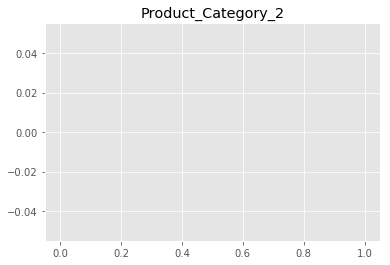

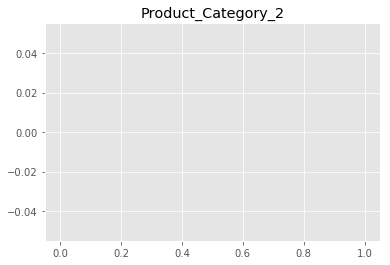

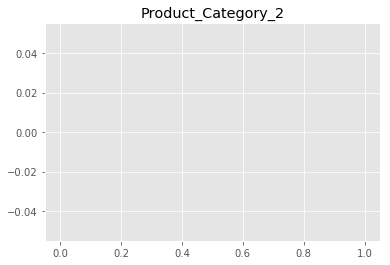

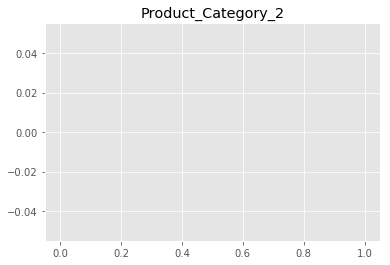

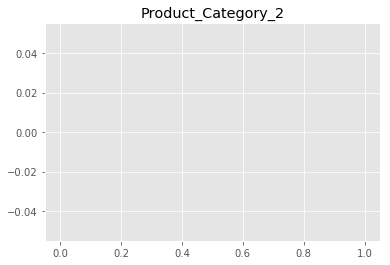

In [26]:
# distrbution of Product2 given Product1
df.groupby(['Product_Category_1']).hist(column='Product_Category_2')

In [27]:
# combine Prod_1, Prod_2 and Prod_3
temp = df.apply(lambda x:\
            '-'.join([str(x['Product_Category_1']),\
                      str(x['Product_Category_2']), \
                      str(x['Product_Category_3']), \
                     ]), axis=1 )
# name of column in newly created pandas series
temp.name='Product_Cat123'
#'-'.join([str(df.loc[2, 'Product_Category_1']), str(df.loc[2, 'Product_Category_2']) ] )
# could convert to string first with
#df.iloc[:,('col1', 'col2')].astype(str)

In [28]:
# number of different (Prod1-Prod2-Prod3) combination
temp.value_counts().count()

237

In [29]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelBinarizer
Prod_encoder = LabelBinarizer(sparse_output=True)
Prod_coded = Prod_encoder.fit_transform(temp.values)

# print all categories
print(Prod_encoder.classes_[:5])
# print associated encoded values
print(Prod_encoder.fit_transform(Prod_encoder.classes_)[:5])
# resulting feature array should have as many columns as categories
print(Prod_coded.shape)

['1-11.0-15.0' '1-11.0-16.0' '1-11.0-nan' '1-13.0-14.0' '1-13.0-15.0']
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1
  (4, 4)	1
(550068, 237)


## User ID

In [30]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelBinarizer
User_encoder = LabelBinarizer(sparse_output=True)
User_coded = User_encoder.fit_transform(df.User_ID.values)

# print all categories
print(User_encoder.classes_[:5])
# print associated encoded values
print(User_encoder.fit_transform(User_encoder.classes_)[:5])
# resulting feature array should have as many columns as categories
print(User_coded.shape)

# users are already encoded, only need one-hot encoding
#TODO

[1000001 1000002 1000003 1000004 1000005]
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1
  (4, 4)	1
(550068, 5891)


## Product ID

In [31]:
# number of different products
df.Product_ID.value_counts().count()

3631

In [32]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelBinarizer
ProdID_encoder = LabelBinarizer(sparse_output=True)
ProdID_coded = ProdID_encoder.fit_transform(df.Product_ID.values)

# print all categories
print(ProdID_encoder.classes_[:5])
# print associated encoded values
print(ProdID_encoder.fit_transform(ProdID_encoder.classes_)[:5])
# resulting feature array should have as many columns as categories
print(ProdID_coded.shape)

['P00000142' 'P00000242' 'P00000342' 'P00000442' 'P00000542']
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1
  (4, 4)	1
(550068, 3631)


### Does each Product ID refer to a unique product category?

In [33]:
# Group by product ID and see if each Product ID occurrence has a unique Product category triplet
df_ProdIDCat = pd.concat([df.loc[:,'Product_ID'], temp], axis=1)
df_ProdIDCat.count()

Product_ID        550068
Product_Cat123    550068
dtype: int64

In [34]:
# this produces an empty dataframe as they are no remaining data (only two columns)
# BUT index has tuples and if the first element repeats in more than one tuples then they are Product ID that fits
# in different category triplet
s = df_ProdIDCat.groupby(['Product_ID', 'Product_Cat123']).count()

# group by Prod ID then count the different Prod cat triplet for each Prod ID
s = df_ProdIDCat.groupby(['Product_ID']).Product_Cat123.value_counts()
# compare size of first level index (size of Prod ID returns the number of unique ProdID)
# to second level index (Prod Cat triplet, get all values as list and use length so that it doesn't only count unique values)
print(s.index.levels[0].size)
print(len(s.index.get_level_values(1)))
# NOTE: get_level_values()  returns a Int64Index object, len() and .shape work on it. List uses len(), numpy array uses .shape

# # EXTRA: filter df_ProdIDCat by product (too slow!)
# for ind, ID in df.Product_ID.value_counts().iteritems():
#     if df_ProdIDCat[df_ProdIDCat.Product_ID == ID].Product_Cat123.value_counts().size > 1:
#         print(ind,ID)

3631
3631


Conclusion is each product ID belongs to a unique Prod Cat123

## Combination of Age and Marital Status and City Category

In [35]:
temp_Age_Marital_City = df.apply(lambda x:\
            '-'.join([str(x['Age']),\
                      str(x['Marital_Status']), \
                      str(x['City_Category']), \
                     ]), axis=1 )

In [36]:
temp_Age_Marital_City.value_counts()

26-35-0-B    56191
26-35-0-A    46374
26-35-1-B    35393
18-25-0-B    33663
26-35-0-C    30731
36-45-0-B    30130
26-35-1-A    27371
26-35-1-C    23527
18-25-0-C    23088
18-25-0-A    21793
36-45-0-C    21524
36-45-1-B    17468
46-50-1-B    15553
36-45-0-A    14723
36-45-1-C    14274
51-55-1-B    12969
46-50-1-C    12287
36-45-1-A    11894
51-55-1-C    10372
18-25-1-B     9584
55+-1-C       8088
0-17-0-C      7123
18-25-1-C     5790
18-25-1-A     5742
0-17-0-B      5435
46-50-0-C     5401
46-50-1-A     5171
46-50-0-B     4853
51-55-0-B     4772
55+-0-C       4681
51-55-1-A     4321
51-55-0-C     4289
55+-1-B       3485
0-17-0-A      2544
46-50-0-A     2436
55+-1-A       2048
51-55-0-A     1778
55+-0-B       1677
55+-0-A       1525
dtype: int64

In [37]:
# use scikit-learn encoder
from sklearn.preprocessing import LabelBinarizer
Age_Marital_City_encoder = LabelBinarizer(sparse_output=True)
Age_Marital_City_coded = Age_Marital_City_encoder.fit_transform(temp_Age_Marital_City.values)

# Linear Regression


In [38]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [39]:
import numpy as np
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1, normalize=False, fit_intercept=True)
# n_jobs doesn't speed up because I only have one target (Purchase)
#TODO, add sample_weight to fit() higher weights for underrepresented prod cat

# intercept = csr_matrix( np.ones((Gender_coded.shape[0],1))*1 )
# X = Prod_coded.toarray()
# X = np.concatenate(( np.ones((Gender_coded.shape[0],1)) , Prod_coded.toarray() ), axis=1)
# X = hstack( (Gender_coded,\
#              Age_coded,\
#              Occ_coded,\
#              City_coded,\
#              Years_Current_City_csr,\
#              Mar_status,\
#              ProdID_coded,\
#              User_coded,\
#              Prod_coded ))
# X = hstack( ( Gender_coded,\
#              Age_Marital_City_coded,\
#              Years_Current_City_csr,\
#              Occ_coded,\
#              User_coded,\
#              ProdID_coded,\
#              Prod_coded ))
X = hstack( ( User_coded,\
             ProdID_coded,\
             Prod_coded ))
Years_Current_City_poly
y = df.Purchase.values
model.fit(X, y)
model.intercept_, model.coef_[0], model.coef_.shape, X.shape

(9263.9687129591257, 134.76736290713913, (9759,), (550068, 9759))

In [40]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)
print('Chi-Square = {:.4f}'.format(r2_score(y, y_pred)))

from sklearn.metrics import mean_squared_error
print('MSE = {:.4f}'.format(mean_squared_error(y, y_pred)))
print('RMSE = {:.4f}'.format(np.sqrt(mean_squared_error(y, y_pred))))

Chi-Square = 0.7608
MSE = 6034115.0512
RMSE = 2456.4436


In [41]:
X.shape
y.shape
X.shape[0]
# intercept.shape
# Prod_coded.shape

550068

# Am I overfitting?

No, I'm underfitting!

The exact solution is  x = 0                              


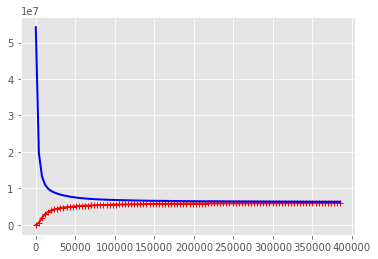

In [42]:
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
    # split data/target in train and test sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    train_errors, val_errors = [], []
    train_sizes = np.linspace(1, X_train.shape[0], 100, dtype='int64')
    for m in train_sizes:
        # train with m samples
        model.fit(X_train[:m], y_train[:m])
        # predict training data and val data
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        # save MSE metric
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
    plt.plot(train_sizes, val_errors, 'b-', linewidth=2, label='validation')

plot_learning_curve(model,X,y)

# Linear Regression (SGD version)
SGD: Stochastic Gradient Descent

In [43]:
from sklearn.linear_model import SGDRegressor
model_SGD = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=1e-3, shuffle=True)
model_SGD.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [44]:
y_predSGD = model_SGD.predict(X)
from sklearn.metrics import mean_squared_error
print('MSE = {:.4f}'.format(mean_squared_error(y, y_predSGD)))
print('RMSE = {:.4f}'.format(np.sqrt(mean_squared_error(y, y_predSGD))))

MSE = 6053937.7087
RMSE = 2460.4751


In [45]:
model_SGD.n_iter_

34

# Test results Linear Regression
Run algo on test data to submit answer

In [46]:
filename = './test_HujdGe7/test.csv'
df_test = pd.read_csv(filename)

from scipy.sparse import csr_matrix
Years_Current_City_t = df_test.loc[:,'Stay_In_Current_City_Years'].apply(lambda x: 4 if x == '4+' else int(x)).values
Years_Current_City_t = csr_matrix(Years_Current_City_t.reshape(-1,1))
User_coded_t = User_encoder.transform(df_test.User_ID.values)
ProdID_coded_t = ProdID_encoder.transform(df_test.Product_ID.values)
# combine Prod_1, Prod_2 and Prod_3
temp_t = df_test.apply(lambda x:\
            '-'.join([str(x['Product_Category_1']),\
                      str(x['Product_Category_2']), \
                      str(x['Product_Category_3']), \
                     ]), axis=1 )
Prod_coded_t = Prod_encoder.transform(temp_t.values)
# combine age, marital status and city
temp_Age_Marital_City_t = df_test.apply(lambda x:\
            '-'.join([str(x['Age']),\
                      str(x['Marital_Status']), \
                      str(x['City_Category']), \
                     ]), axis=1 )
Age_Marital_City_coded_t = Age_Marital_City_encoder.transform(temp_Age_Marital_City_t.values)
Occ_coded_t = Occ_encoder.transform(df_test.Occupation.values.reshape(-1,1))
Gender_coded_t = Gender_encoder.transform(df_test.Gender.values)
Gender_coded_t = csr_matrix(Gender_coded_t.reshape(-1,1))
Intercept_t = csr_matrix(np.ones( (Gender_coded_t.shape[0],1) ) )

# X_test = hstack( ( Years_Current_City_t,\
#              Gender_coded_t,\
#              Age_Marital_City_coded_t,\
#              Occ_coded_t,\
#              User_coded_t,\
#              ProdID_coded_t,\
#              Prod_coded_t ) )
X_test = hstack( (User_coded_t,\
             ProdID_coded_t,\
             Prod_coded_t ) )

y_pred_test = model.predict(X_test)

In [47]:
df_results = df_test.loc[:,('User_ID','Product_ID')]
df_results['Purchase'] = y_pred_test.reshape(-1,1)
df_results.to_csv('Submission.csv', index=False)

# Correlation
Let's see what correlation between features tells us.

In [48]:
# start with a dataframe copy
df_cpy = df.copy()
# one needs to encode categorical values first
# use scikit-learn encoder
from sklearn.preprocessing import LabelEncoder
Gender = LabelEncoder()
df_cpy.Gender = Gender.fit_transform(df.Gender.values)
Age = LabelEncoder()
df_cpy.Age = Age.fit_transform(df.Age.values)
City = LabelEncoder()
df_cpy.City_Category = City.fit_transform(df.City_Category.values)
Years = LabelEncoder()
df_cpy.Stay_In_Current_City_Years = Years.fit_transform(df.Stay_In_Current_City_Years.values)
P_ID = LabelEncoder()
df_cpy.Product_ID = P_ID.fit_transform(df.Product_ID.values)
U_ID = LabelEncoder()
df_cpy.User_ID = U_ID.fit_transform(df.User_ID.values)
# show correlation
df_cpy.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.017862,-0.033464,0.032703,-0.023972,0.022880,-0.030789,0.020478,0.003812,0.001508,0.003399,0.004730
Product_ID,-0.017862,1.000000,0.015916,0.023476,0.007424,0.007032,-0.002398,0.011621,0.074717,0.013972,0.026679,-0.109345
Gender,-0.033464,0.015916,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.018591,0.028069,0.060346
Age,0.032703,0.023476,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.054877,0.057346,0.015839
Occupation,-0.023972,0.007424,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,-0.000384,0.013263,0.020833
City_Category,0.022880,0.007032,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.011822,-0.002347,0.061914
Stay_In_Current_City_Years,-0.030789,-0.002398,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001657,0.002093,0.005422
Marital_Status,0.020478,0.011621,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003812,0.074717,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001508,0.013972,-0.018591,0.054877,-0.000384,-0.011822,-0.001657,0.015138,0.540583,1.000000,0.543649,-0.209918


Product Category 1 does help the most.  Product ID is second.<br>
If you want to use Cat 2 and Cat3 then combine them with Cat1 as they are somewhat correlated.<br>
Other features are expected to help just a little.<br>

Age and Marital status is 31% correlated. <br>
Age and City category is 12% correlated. <br>
Gender and Occupation is 11% correlated.<br>



# Polynomial model

To generate a non-linear model in order to improve our model accuracy, we can use scikit-learn PolynomialFeatures method.
It needs a dense matrix. Our feature matrix is sparse otherwise we will run out of memory. Thus it is not possible (at least on my machine) to generate polynomial features on all features.
It doesn't help to create polynomes on categorical features when we use one-hot encoding.<br><br>
Only years in current city is numeric (i.e. not categorical) I tried adding polynomes of years in current city. No improvement on metrics, it even decreased performance when degree > 3.

In [49]:
# from sklearn.preprocessing import PolynomialFeatures
# # object to compute 
# poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
# # compute polynomial features
# X_poly = poly.fit_transform(X)
# model.fit(X_poly, y)
# y_pred = model.predict(X_poly)
# print('{:.4f}'.format(r2_score(y, y_pred)))

# Ridge Regularization
Learning curves shows there is no overfit. So there shouldn't be an improvement by adding regularization.

# Tree
Use tree instead of linear Regression